# WeatherPy
----
In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your first objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

##### Hints and Considerations

* The city data you generate is based on random coordinates as well as different query times; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Once you have computed the linear regression for one chart, the process will be similar for all others. As a bonus, try to create a function that will create these charts based on different parameters.

* Remember that each coordinate will trigger a separate call to the Google API. If you're creating your own criteria to plan your vacation, try to reduce the results in your DataFrame to 10 or fewer cities.

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [74]:
lat_lng = str(input(f'Enter latitude and longtitude in form (lat,lng):'))
lat,lng = lat_lng.split(',')
city = citipy.nearest_city(float(lat), float(lng))
#set(dir(city))
print(f"The cooridinates {lat},{lng} nearest city is: {city.city_name},{city.country_code}")


Enter latitude and longtitude in form (lat,lng):45.67,23.45
The cooridinates 45.67,23.45 nearest city is: cugir,ro


## Generate Cities List

In [91]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

city_country = zip(cities,countries)
# Print the city count to confirm sufficient count
#print([i for i in city_country])
print(len(cities))


630


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [92]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "grajau"
country_code = "br"
query_url = f"{url}appid={api_key}&q={city},{country_code}&units={units}"
response = requests.get(query_url).json()
print(query_url)
print(f"The temperature information received is: {response['main']['temp']}")
print(f"The humidity information received is: {response['main']['humidity']}")
print(f"The clouds information received is: {response['clouds']['all']}")
print(f"The wind speed information received is: {response['wind']['speed']}")

http://api.openweathermap.org/data/2.5/weather?appid=6a6e5292617349bd250145ca6faa12c5&q=grajau,br&units=imperial
The temperature information received is: 83.12
The humidity information received is: 80
The clouds information received is: 100
The wind speed information received is: 4.63


In [93]:
# set up lists to hold reponse info
city_num = []
city_name = []
latitude = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
myfile = open('weatherAPI_output.txt', 'w')
# Loop through the list of tuples of cities,country codes and perform a request for data on each
for city,country_code in city_country:
    query_url = f"{url}appid={api_key}&q={city},{country_code}&units={units}"
    response = requests.get(query_url).json()
    #print(query_url)
        # Try to grab the temp,humidity,cloudiness and wind speed if they are available in the Weather API
    try:
        city_num.append(response['id'])
        city_name.append(response['name'])
        latitude.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        print(f"{city} with city number:{response['id']} was found in the Weathermap API\n")
        myfile.write(f"{city} with city number:{response['id']} was found in the Weathermap API\n")
    # Handle exceptions for a city that is not available in the Weather API
    except:
        # Append null values
        print(f"{city},{country_code} was not found in the Weathermap API\n")
        myfile.write(f"{city},{country_code} was not found in the Weathermap API\n")
        city_num.append(None)
        city_name.append(None)
        latitude.append(None)
        temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        pass
myfile.close()

busselton with city number:2075265 was found in the Weathermap API

ushuaia with city number:3833367 was found in the Weathermap API

nome with city number:5870133 was found in the Weathermap API

labuhan with city number:8079926 was found in the Weathermap API

nikolskoye with city number:546105 was found in the Weathermap API

hermanus with city number:3366880 was found in the Weathermap API

pisco with city number:3932145 was found in the Weathermap API

tupik with city number:2014836 was found in the Weathermap API

sitka with city number:5557293 was found in the Weathermap API

praia da vitoria with city number:3372760 was found in the Weathermap API

teneguiban,ph was not found in the Weathermap API

chokurdakh with city number:2126123 was found in the Weathermap API

geraldton with city number:2070998 was found in the Weathermap API

chapais with city number:5919850 was found in the Weathermap API

mahebourg with city number:934322 was found in the Weathermap API

lasa,cn was no

alofi with city number:4036284 was found in the Weathermap API

vaini with city number:4032243 was found in the Weathermap API

thompson with city number:6165406 was found in the Weathermap API

avera,pf was not found in the Weathermap API

khatanga with city number:2022572 was found in the Weathermap API

quthing with city number:932183 was found in the Weathermap API

guipavas with city number:3014213 was found in the Weathermap API

ancud with city number:3899695 was found in the Weathermap API

aykhal with city number:2027296 was found in the Weathermap API

grimshaw with city number:5967157 was found in the Weathermap API

lolua,tv was not found in the Weathermap API

valparaiso with city number:3868626 was found in the Weathermap API

houma with city number:4328010 was found in the Weathermap API

davila with city number:1715335 was found in the Weathermap API

saint-philippe with city number:935215 was found in the Weathermap API

de aar with city number:1011632 was found in the

inhambane with city number:1045114 was found in the Weathermap API

mumford with city number:2297810 was found in the Weathermap API

tasiilaq with city number:3424607 was found in the Weathermap API

ust-ordynskiy with city number:2013894 was found in the Weathermap API

kirando with city number:157107 was found in the Weathermap API

cumaribo,co was not found in the Weathermap API

katsuura with city number:2112309 was found in the Weathermap API

olafsvik with city number:3414079 was found in the Weathermap API

sentyabrskiy,ru was not found in the Weathermap API

bengbu with city number:1816440 was found in the Weathermap API

komsomolskiy with city number:545728 was found in the Weathermap API

idenao with city number:2594800 was found in the Weathermap API

san cristobal with city number:3651949 was found in the Weathermap API

yar-sale with city number:1486321 was found in the Weathermap API

chase with city number:5920381 was found in the Weathermap API

ratanpur with city numb

sarab with city number:126972 was found in the Weathermap API

sao jose da coroa grande with city number:3388456 was found in the Weathermap API

north bend with city number:5742974 was found in the Weathermap API

katherine with city number:2068655 was found in the Weathermap API

caravelas with city number:3466980 was found in the Weathermap API

hispania with city number:3680857 was found in the Weathermap API

scottsburgh,za was not found in the Weathermap API

sovetskiy with city number:1491230 was found in the Weathermap API

pevek with city number:2122090 was found in the Weathermap API

gameleira with city number:3399132 was found in the Weathermap API

carballo with city number:3126369 was found in the Weathermap API

dabat with city number:340358 was found in the Weathermap API

murgab with city number:1218612 was found in the Weathermap API

himora,et was not found in the Weathermap API

visby with city number:2662689 was found in the Weathermap API

port lincoln with city n

nemuro with city number:2128975 was found in the Weathermap API

haibowan,cn was not found in the Weathermap API

nsoko with city number:934900 was found in the Weathermap API

aquiraz with city number:3407407 was found in the Weathermap API

krasnoyarka with city number:1502041 was found in the Weathermap API

sibiti with city number:2255285 was found in the Weathermap API

obukhiv with city number:698782 was found in the Weathermap API

biltine with city number:244878 was found in the Weathermap API

gat,ly was not found in the Weathermap API

iracoubo with city number:3381428 was found in the Weathermap API

mezen with city number:527321 was found in the Weathermap API

hegang with city number:2036986 was found in the Weathermap API

sokolo with city number:2450849 was found in the Weathermap API

lensk with city number:2020838 was found in the Weathermap API

esmeraldas with city number:3652065 was found in the Weathermap API

touros with city number:3386213 was found in the Weathe

In [94]:
print(f'temp list length: {len(temp)}')


temp list length: 630


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [95]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city_name": city_name,
    "city_num": city_num,
    "latitude": latitude,
    "country": countries,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city_name,city_num,latitude,country,temp,humidity,cloudiness,wind_speed
0,Busselton,2075265.0,-33.65,au,62.17,52.0,80.0,11.50
1,Ushuaia,3833367.0,-54.80,ar,55.40,54.0,75.0,3.06
2,Nome,5870133.0,64.50,us,-15.27,75.0,1.0,7.31
3,Labuhan,8079926.0,-6.88,id,76.84,86.0,40.0,1.92
4,Nikolskoye,546105.0,59.70,ru,34.74,96.0,67.0,13.42


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

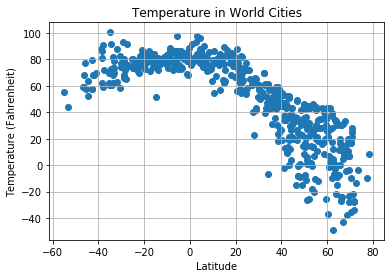

In [99]:
# Build a scatter plot for Latitude vs.Temperature in Fahrenheit
plt.scatter(weather_data["latitude"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

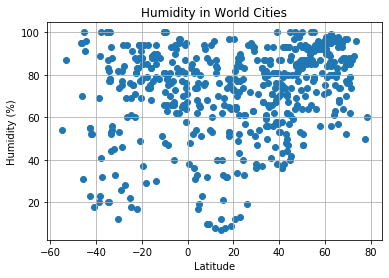

In [100]:
# Build a scatter plot for Latitude vs. Humidity
plt.scatter(weather_data["latitude"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

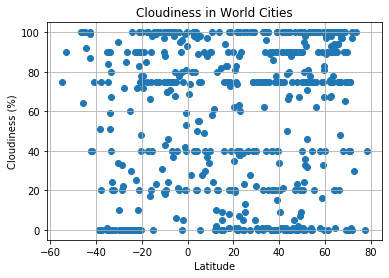

In [101]:
# Build a scatter plot for Latitude vs. Cloudiness
plt.scatter(weather_data["latitude"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

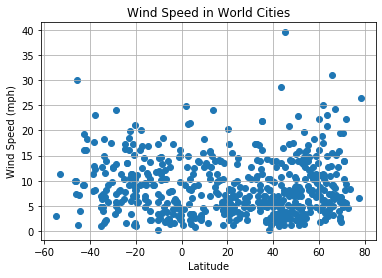

In [102]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data["latitude"], weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression